In [1]:
!pip -q install git+https://github.com/mikekestemont/copia.git@feature/coverage-based-rarefaction


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
#This function aThis function allows you to make a dataset object based on counts or observations (in our case, probably counts):
#Allows you to make a dataset object based on counts or observations (in our case, probably counts):

In [2]:
from copia.data import to_copia_dataset
from copia.rarefaction_extrapolation import species_accumulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv("../data/df_indi_works_occupations.csv", index_col=0)
print(df.occupation.value_counts())

regions = pd.read_csv(
    "../data/ENS - Cultural Index - Countries Databases - region_level.csv"
)
regions["region_name"][regions["region_name"] == "Slav world"] = "East Slavic"
regions = regions[regions["level"] == 2]
regions = regions[regions["region_name"] != "Balkans"]
regions = regions[
    regions["region_name"] != "Eastern Europe"
]  # remove because it takes East Slavic and Central Europe
regions = set(regions["region_name"])
df = df[df["region_name"].isin(regions)]

df["century"] = df["decade"].round(-2)

# Avoid overlapping with Antiquity

df = df[~((df["region_name"] == "Italy") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Italy") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Portugal") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Spain") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Arabic world") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Balkans") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "France") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "United Kingdom") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Low countries") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "East Slavic") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Central Europe") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Eastern Europe") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "German world") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Latin world") & (df["decade"] > 500))]


df["count"] = df["count_works"]
df_m = df.copy()
#df_m = df_m[df_m["count"].isin({0, 1, 2})]  # Not more ?
df_m['count_works'][df_m['count_works']==0] = 1
df_m = df_m[['individual_wikidata_id', 'count_works', 'region_name', 'decade']].drop_duplicates()
df_m['count_works'] = df_m['count_works'].astype(int)

#df_m["y"] = df_m["count"].map({0: 0, 1: 0, 2: 1})

occupation
Writer               213332
Painter              129267
Musician              55327
Sculptor              32894
Architect             29531
Performing Artist     13618
Name: count, dtype: int64


In [4]:
len(df_m[(df_m['region_name'] == 'United Kingdom') & (df_m['decade'] > 800) & (df_m['decade'] <= 900)])

0

In [30]:
interval_size = 200
start_year = 400
end_year = 1600

time_intervals = [(start_year + i, start_year + i + interval_size) for i in range(0, end_year - start_year, interval_size)]

final_results = {}
common_coverage = {}
df_regions = {}

for times in time_intervals:
    
    print(times)
    min_time = times[0]
    max_time = times[1]

    #regions = ['France', 'Low countries']
    regions = ['Italy', 'Chinese world']

    acc_regions = {}
    copia_datasets = {}

    for region in regions:
        print(region)

        df_fil = df_m[(df_m['region_name'] == region) & (df_m['decade'] > min_time) & (df_m['decade'] <= max_time)]
        #df_fil = df_m[(df_m['region_name'] == region)]
        df_regions[region] = df_fil

        ds = to_copia_dataset(df_fil, 
                            data_type='abundance', 
                            input_type='counts',
                            index_column='individual_wikidata_id', 
                            count_column='count_works')
        
        copia_datasets[region] = ds
        

        acc = species_accumulation(ds, step_size=10, compute_coverage=True, max_steps = ds.n)
        acc = acc.reset_index()
        acc = acc[acc['interpolated']==True]
        acc_regions[region] = acc


    # Compute the reference point
    max_coverage = {}
    for region in regions:
        max_cov = max(acc_regions[region]['coverage'])
        max_coverage[region]  = max_cov

    reference_point = min(max_coverage, key=lambda k: max_coverage[k])
    reference_value = max_coverage[reference_point]
    max_coverage[times] = reference_value
    common_coverage[times] = reference_value

    # Get the value based on the reference point
    final_est = {}
    for region in regions:
        acc_regions[region]['diff'] = abs(acc_regions[region]['coverage'] - reference_value)
        acc_regions[region] = acc_regions[region].sort_values('diff', ascending=True)
        res = acc_regions[region]['est'].iloc[0]
        final_est[region] = res

    final_results[times] = final_est


(400, 600)
Italy


  0%|          | 0/100 [00:00<?, ?it/s]

Chinese world


  0%|          | 0/100 [00:00<?, ?it/s]

(600, 800)
Italy


  0%|          | 0/100 [00:00<?, ?it/s]

Chinese world


  0%|          | 0/100 [00:00<?, ?it/s]

(800, 1000)
Italy


  0%|          | 0/100 [00:00<?, ?it/s]

Chinese world


  0%|          | 0/100 [00:00<?, ?it/s]

(1000, 1200)
Italy


  0%|          | 0/100 [00:00<?, ?it/s]

Chinese world


  0%|          | 0/100 [00:00<?, ?it/s]

(1200, 1400)
Italy


  0%|          | 0/100 [00:00<?, ?it/s]

Chinese world


  0%|          | 0/100 [00:00<?, ?it/s]

(1400, 1600)
Italy


  0%|          | 0/100 [00:00<?, ?it/s]

Chinese world


  0%|          | 0/100 [00:00<?, ?it/s]

In [31]:
# df_test = df_m[df_m['region_name']=='Italy']
# df_test = df_test.groupby('decade')['individual_wikidata_id'].count().reset_index()
# df_test.head(20)

In [39]:
ratio_analysis = pd.DataFrame(final_results).T
ratio_analysis['ratio'] = ratio_analysis['Italy'] / ratio_analysis['Chinese world']


,,Italy,Chinese world,ratio
400,600,11.87,10.44,1.14
600,800,5.71,13.50,0.42
800,1000,9.59,1.00,9.59
1000,1200,67.58,9.65,7.00
1200,1400,551.55,32.86,16.79
1400,1600,3386.63,40.04,84.57


In [45]:
original_ratio = {}
for times in time_intervals:

    min_time = times[0]
    max_time = times[1]

    #regions = ['France', 'Low countries']
    regions = ['Italy', 'Chinese world']
    count_indi = []
    for region in regions:
        df_fil = df_m[(df_m['region_name'] == region) & (df_m['decade'] > min_time) & (df_m['decade'] <= max_time)]
        count_indi.append(len(df_fil))

    ratio = count_indi[0]/ count_indi[1]
    original_ratio[times] = ratio

{(400, 600): 0.3333333333333333,
 (600, 800): 0.07692307692307693,
 (800, 1000): 0.13414634146341464,
 (1000, 1200): 0.8292682926829268,
 (1200, 1400): 2.567441860465116,
 (1400, 1600): 14.417021276595746}

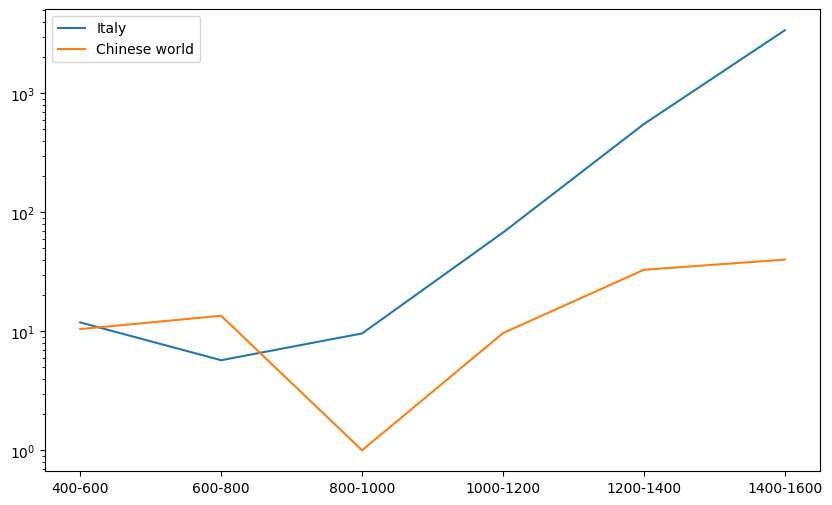

In [42]:
time_periods = []
france_values = []
low_countries_values = []
ratio_values = []

for time_period, values in final_results.items():
    time_periods.append(time_period)
    france_values.append(values[regions[0]])
    low_countries_values.append(values[regions[1]])
    ratio_values.append(values[regions[1]]/values[regions[0]])

time_periods = [f'{x[0]}-{x[1]}' for x in time_periods]
plt.figure(figsize=(10, 6))
plt.plot(time_periods, low_countries_values, label=regions[1])

plt.plot(time_periods, france_values, label=regions[0])
plt.legend()
plt.yscale('log')


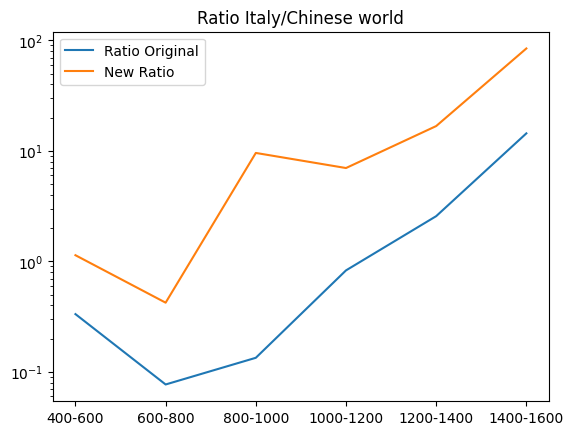

In [60]:
plt.plot(time_periods, list(original_ratio.values()), label='Ratio Original')
plt.plot(time_periods, ratio_values, label='New Ratio')
plt.legend()
plt.title("Ratio Italy/Chinese world")
plt.yscale('log')

In [4]:
granularity = 50

if granularity == 50:

    #df_cultura = pd.read_csv("../unseen_species_model/results/occupation/raw_results.csv", index_col = [0])
    df_cultura = pd.read_csv("../results_50/raw_results.csv", index_col = [0])

elif granularity == 10:
    df_cultura = pd.read_csv("../results_10/raw_results.csv", index_col = [0])

df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})

In [12]:
list(set(df_cultura['region_name']))

['Chinese world',
 'Korea',
 'Nordic countries',
 'Persian world',
 'Italy',
 'Portugal',
 'Arabic world',
 'Central Europe',
 'German world',
 'East Slavic',
 'Indian world',
 'France',
 'Low countries',
 'Spain',
 'Greek World',
 'Latin World',
 'Japan',
 'United Kingdom']

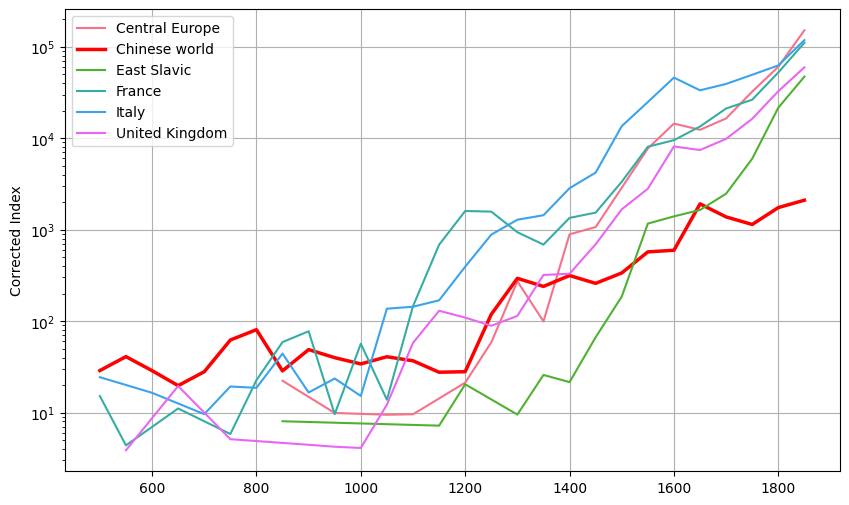

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data
df_cultura_fil = df_cultura[df_cultura['region_name'].isin(['Italy', 'Chinese world', 'United Kingdom', 'Central Europe', 'France', 'East Slavic'])]
df_cultura_fil = df_cultura_fil[df_cultura_fil['decade'] >= 500]

# Get unique region names
regions = df_cultura_fil['region_name'].unique()

# Define color palette
colors = sns.color_palette("husl", len(regions))

# Plotting
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    df_region = df_cultura_fil[df_cultura_fil['region_name'] == region]
    if region == 'Chinese world':
        plt.plot(df_region['decade'], df_region['N_est'], label=region, color='red', linewidth=2.5)
    else:
        plt.plot(df_region['decade'], df_region['N_est'], label=region, color=colors[i])

# Adding labels and legend
plt.xlabel('')
plt.ylabel('Corrected Index')
plt.title('')
plt.legend()
plt.yscale('log')

# Displaying the plot
plt.grid(True)
plt.show()


<Axes: xlabel='coverage'>

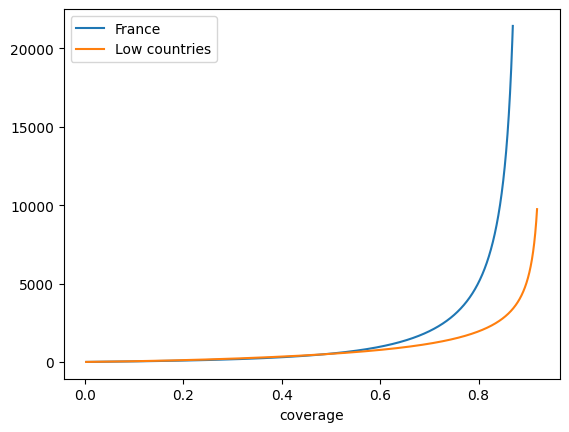

In [77]:
ax = acc_regions['France'].plot(x='coverage', y = 'est', label ='France')
acc_regions['Low countries'].plot(x='coverage', y = 'est', ax=ax, label='Low countries')

In [80]:
ratio =  final_est['Low countries']/final_est['France']
ratio
# ratio between the two diversities at the common level of coverage

0.15803786444598722

In [81]:
uncorrected_ratio = copia_datasets['Low countries'].S_obs/copia_datasets['France'].S_obs
uncorrected_ratio

0.45469391564016426

In [ ]:
acc_low_countries_interpolated['diff'] = abs(acc_low_countries_interpolated['coverage'] - common_coverage)
acc_low_countries_interpolated = acc_low_countries_interpolated.sort_values('diff', ascending=True)
low_countries_est = acc_low_countries_interpolated['est'].iloc[0]


acc_france_interpolated = acc_france_interpolated[acc_france_interpolated['coverage'] == common_coverage]
france_est = acc_france_interpolated['est'].iloc[0]

In [ ]:
acc_low_countries_interpolated = acc_low_countries[acc_low_countries['interpolated']==True]
max_coverage_low_countries = acc_low_countries_interpolated.iloc[-1]['coverage']

acc_france_interpolated = acc[acc['interpolated']==True]
max_coverage_france = acc_france_interpolated.iloc[-1]['coverage']

if max_coverage_low_countries > max_coverage_france:
    reference_point = 'France'
    common_coverage = max_coverage_france
else:
    reference_point = 'Low countries'
    common_coverage = max_coverage_low_countries

In [ ]:

df_test_low_countries = df_m[df_m['region_name']=='Low countries']
df_test_low_countries = df_test_low_countries[['individual_wikidata_id', 'count_works', 'region_name']].drop_duplicates()
df_test_low_countries['count_works'] = df_test_low_countries['count_works'].astype(int)

df_test_low_countries

In [22]:


ds_low_countries = to_copia_dataset(df_test_low_countries, 
                      data_type='abundance', 
                      input_type='counts',
                      index_column='individual_wikidata_id', 
                      count_column='count_works')

In [28]:
acc_low_countries = species_accumulation(ds_low_countries, step_size=10, compute_coverage=True, max_steps = ds_low_countries.n)
acc_low_countries = acc_low_countries.reset_index()

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: xlabel='coverage'>

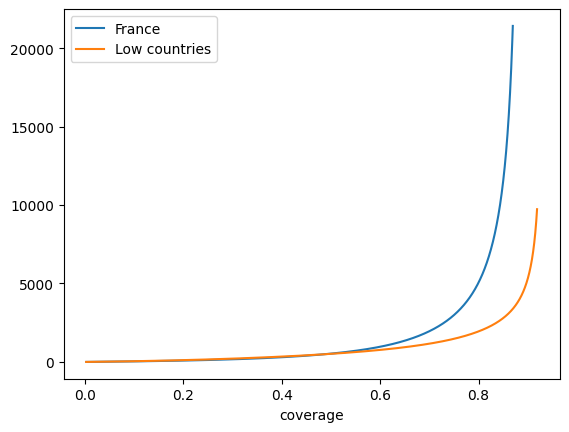

In [38]:
ax = acc[acc['interpolated']].plot(x='coverage', y = 'est', label ='France')
acc_low_countries[acc_low_countries['interpolated']].plot(x='coverage', y = 'est', ax=ax, label='Low countries')


# The diversity goes quicker for the coverage level


In [48]:
acc_low_countries_interpolated = acc_low_countries[acc_low_countries['interpolated']==True]
max_coverage_low_countries = acc_low_countries_interpolated.iloc[-1]['coverage']

acc_france_interpolated = acc[acc['interpolated']==True]
max_coverage_france = acc_france_interpolated.iloc[-1]['coverage']

if max_coverage_low_countries > max_coverage_france:
    reference_point = 'France'
    common_coverage = max_coverage_france
else:
    reference_point = 'Low countries'
    common_coverage = max_coverage_low_countries

0.17142288971782127

In [70]:
acc_low_countries_interpolated['diff'] = abs(acc_low_countries_interpolated['coverage'] - common_coverage)
acc_low_countries_interpolated = acc_low_countries_interpolated.sort_values('diff', ascending=True)
low_countries_est = acc_low_countries_interpolated['est'].iloc[0]


acc_france_interpolated = acc_france_interpolated[acc_france_interpolated['coverage'] == common_coverage]
france_est = acc_france_interpolated['est'].iloc[0]